In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv


# **Settings**

In [2]:
# necessary libraries for work
# pip instal markdown
# pip install numpy
# pip install pandas
# pip install ipython
# pip install matplotli
# pip install statsmodels
# pip install scikit-learn
# pip install seaborn

# **Step 1.1**

In [3]:
# library call
import pandas as pd

from IPython.display import Markdown, display

# dataset loading
dataset = pd.read_csv('/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv') # loading dataset from csv file
dataset.head()

def describe_fields(dataset):
    fields = dataset.columns.tolist()
    markdown_text = ""
    for field in fields:
        markdown_text += f"**{field}**: Description of {field}.\n\n"
    return markdown_text

display(Markdown(describe_fields(dataset)))

**show_id**: Description of show_id.

**type**: Description of type.

**title**: Description of title.

**director**: Description of director.

**country**: Description of country.

**date_added**: Description of date_added.

**release_year**: Description of release_year.

**rating**: Description of rating.

**duration**: Description of duration.

**listed_in**: Description of listed_in.



# **Step 1.2**

In [4]:
# a) Check having missing or null values and size database

# library call
import pandas as pd

# dataset loading
df = pd.read_csv('/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv') 

# dateset info output
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
# a)alternative) Check having missing values, null values and size dataset

# library call
import pandas as pd

# dataset loading
df = pd.read_csv('/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv') 

# returns True if there is at least one missing value in the dataset, False otherwise
print('missing value:',df.isnull().values.any())
print()

print('count null value:')
print()

# counting the number of null values in each columns
print(df.isnull().sum()) 
print()

# counting the number of rows and columns
print('number of rows and columns:',df.shape) 



missing value: False

count null value:

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

number of rows and columns: (8790, 10)


In [6]:
# d) viewing the main statistical characteristics of dataset data

# library call
import pandas as pd

# dataset loading
df = pd.read_csv('/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv')

# viewing statistical statistics
print(df.describe())

# count: number of filled values in the column
# mean: column average
# std: column standard deviation
# min: the minimum value in the column
# 25%: first quartile value
# 50%: median value
# 75%: third quartile value
# max: maximum value in column

       release_year
count   8790.000000
mean    2014.183163
std        8.825466
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [7]:
# e) rename columns in dataset

# library call
import pandas as pd

# dataset loading
df = pd.read_csv('/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv')

# output dataset before renaming columns
print("Dataset before column renaming:")
print(df.columns)
print()

# rename columns
df = df.rename(columns={"country": "derjavy"}) #country/derjavy

# dataset output after renaming columns
print("Dataset after renaming columns:")
print(df.columns)
print()

# save dataset with new column names
df.to_csv('/kaggle/working/netflix2.csv', index=False)


Dataset before column renaming:
Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

Dataset after renaming columns:
Index(['show_id', 'type', 'title', 'director', 'derjavy', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')



# **Step 1.3**

In [8]:
# a) "cleaning" database

# library call
import pandas as pd

# dataset loading
df = pd.read_csv('/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv')

# checking for missing values
print("Number of missing values in each column:")
print(df.isnull().sum())
print()

# checking for duplicates
if df.duplicated().sum() > 0:
    
    # deleting duplicates
    df = df.drop_duplicates()
    
    # checking for missing values again
    if df.isnull().values.any():
        # deleting rows with missing values
        df = df.dropna()
    
    # saving the cleaned dataset
    df.to_csv('/kaggle/working/cleaned_netflix2.csv', index=False)
    
    # result output
    print("!Data cleaning completed!")
else:
    print("!No data cleansing required!")
    

Number of missing values in each column:
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

!No data cleansing required!


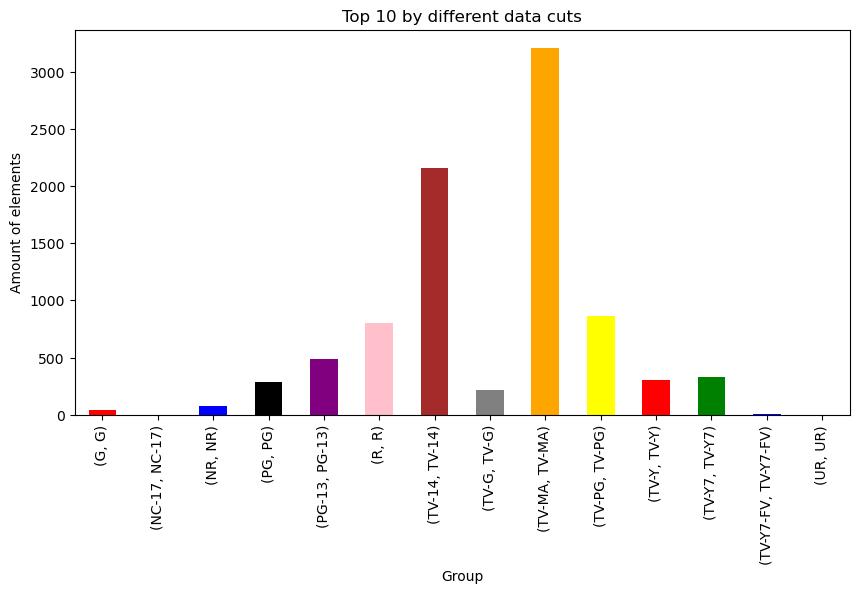

In [9]:
# b) top 10 for data slicing and plotting

# library call
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файла в DataFrame
df = pd.read_csv('/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv')

# Группировка данных и подсчет количества элементов в каждой группе
grouped_data = df.groupby(['rating'])['show_id'].count()

# Получение топ-10 значений по каждой группе
top_10 = grouped_data.groupby(level=0).nlargest(10)

# Вывод графика
colors = ['red', 'green', 'blue', 'black', 'purple', 'pink', 'brown', 'gray', 'orange', 'yellow']
plt.figure(figsize=(10,5))
top_10.plot(kind='bar', color=colors)
plt.title('Top 10 by different data cuts')
plt.xlabel('Group')
plt.ylabel('Amount of elements')
plt.show()

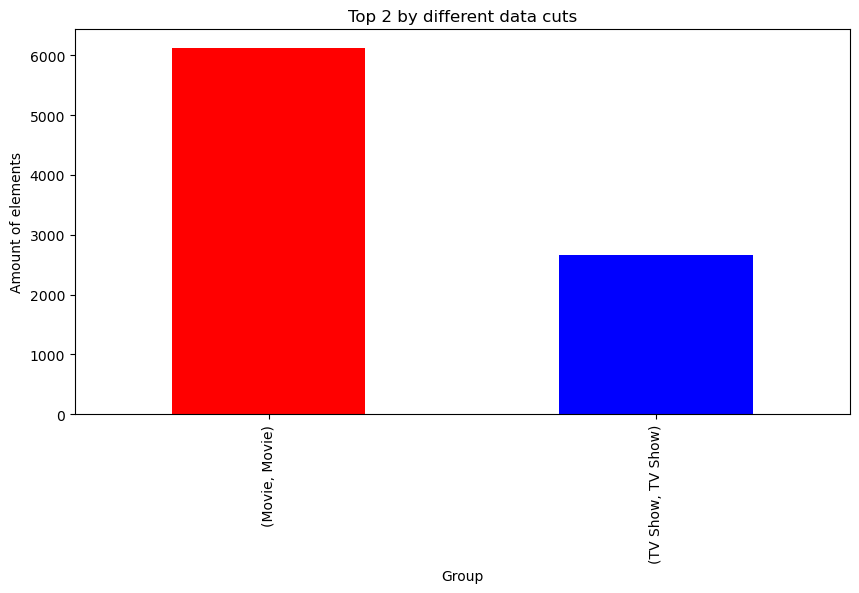

In [10]:
# b)addition) top 2 for data slicing and plotting

# library call
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файла в DataFrame
df = pd.read_csv('/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv')

# Группировка данных и подсчет количества элементов в каждой группе
grouped_data = df.groupby(['type'])['show_id'].count()

# Получение топ-2 значений по каждой группе
top_2 = grouped_data.groupby(level=0).nlargest(2)

# Вывод графика
colors = ['red','blue']
plt.figure(figsize=(10,5))
top_2.plot(kind='bar', color=colors)
plt.title('Top 2 by different data cuts')
plt.xlabel('Group')
plt.ylabel('Amount of elements')
plt.show()

# **Step 1.4**

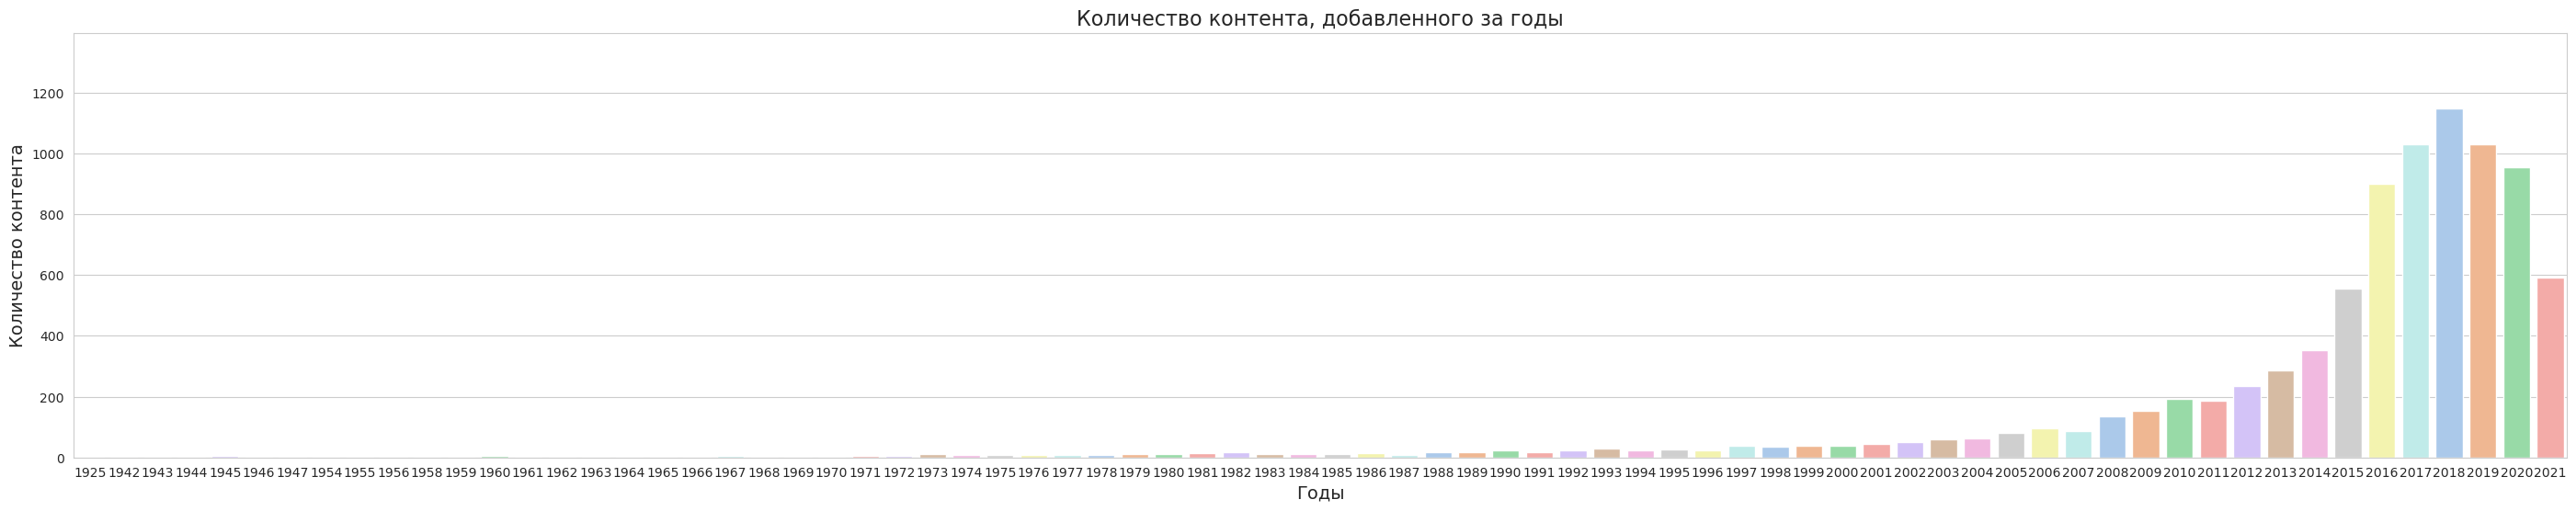

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загружаем датасет
df = pd.read_csv('/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv')

# Группируем данные по году и вычисляем количество записей для каждого года
year_counts = df.groupby(df['release_year'])['show_id'].count().reset_index()

# Создаем график
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.figure(figsize=(35,6))
sns.countplot(x='release_year', data= df, palette="pastel")
plt.title("Количество контента, добавленного за годы", fontsize=16)
plt.xlabel("Годы", fontsize=14)
plt.ylabel("Количество контента", fontsize=14)
plt.ylim(0, max(year_counts['show_id'])+250)
plt.show()

